In [24]:
#imports
import numpy as np
import pandas as pd
import math

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

#import training dataset
df = pd.read_csv(r"C:\Users\owaiskhan\Desktop\python\day.csv")

#see the columns in our data
df.info()
df = df[['season','yr','mnth','workingday','weathersit','d_atemp','d_hum','d_windspeed','cnt']]
# take a look at the head of the dataset
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 20 columns):
instant        731 non-null int64
dteday         731 non-null object
season         731 non-null int64
yr             731 non-null int64
mnth           731 non-null int64
holiday        731 non-null int64
weekday        731 non-null int64
workingday     731 non-null int64
weathersit     731 non-null int64
temp           731 non-null float64
atemp          731 non-null float64
hum            731 non-null float64
windspeed      731 non-null float64
d_temp         731 non-null float64
d_atemp        731 non-null float64
d_hum          731 non-null float64
d_windspeed    731 non-null float64
casual         731 non-null int64
registered     731 non-null int64
cnt            731 non-null int64
dtypes: float64(8), int64(11), object(1)
memory usage: 114.3+ KB


,season,yr,mnth,workingday,weathersit,d_atemp,d_hum,d_windspeed,cnt
0,1,0,1,0,2,7.999250,80.5833,10.749882,985
1,1,0,1,0,2,7.346774,69.6087,16.652113,801
2,1,0,1,1,1,-3.499270,43.7273,16.636703,1349
3,1,0,1,1,1,-1.999948,59.0435,10.739832,1562
4,1,0,1,1,1,-0.868180,43.6957,12.522300,1600


C:\Users\owaiskhan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


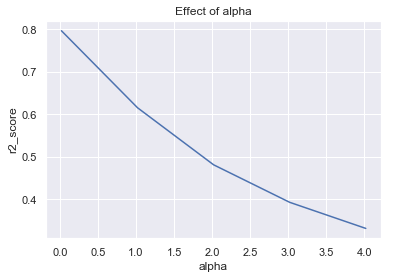

In [47]:
x = df.iloc[:, 0:8].values  
y = df.iloc[:, 8].values 

from sklearn.preprocessing import  MinMaxScaler
sc= MinMaxScaler()
x= sc.fit_transform(x)
y= y.reshape(-1,1)
y=sc.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)  

ridgeReg = Ridge(alpha=.02, normalize=True)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_test)

import numpy
import matplotlib.pyplot as plt
n_alpha = []
scores = []
from sklearn.metrics import r2_score

for i in numpy.arange(.02, 5, 1) :
    ridgeReg = Ridge(alpha=i, normalize=True)
    ridgeReg.fit(x_train,y_train)
    pred = ridgeReg.predict(x_test)
    n_alpha.append(i)
    scores.append(r2_score(y_test , pred))




plt.title("Effect of alpha")
plt.xlabel("alpha")
plt.ylabel("r2_score")
plt.plot(n_alpha, scores)
plt.show()


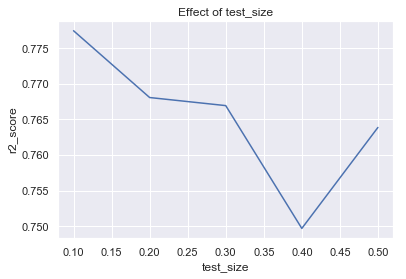

In [48]:
import matplotlib.pyplot as plt
test_split_size = [0.1,0.2,0.3,0.4,0.5]
scores = []
from sklearn.metrics import r2_score


for i in test_split_size :
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i, random_state=0)  
    ridgeReg = Ridge(alpha=.2, normalize=True)
    ridgeReg.fit(x_train,y_train)
    pred = ridgeReg.predict(x_test)
    scores.append(r2_score(y_test , pred))


        
        
       
plt.title("Effect of test_size")
plt.xlabel("test_size")
plt.ylabel("r2_score")
plt.plot(test_split_size, scores)
#print(estimators)
plt.savefig('gradientBoosterscore2.png')
plt.show()
#print(max(scores))

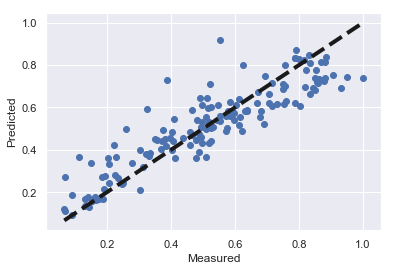

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [37]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.08054841519333175
Mean Squared Error: 0.011448163952249013
Root Mean Squared Error: 0.10699609316348431


In [38]:
from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(y_test, pred)
mse_test

0.011448163952249013

In [39]:
from sklearn.metrics import r2_score
r2_score(y_test , pred)

0.7966401051290788